The first thing to do is to import the needed libraries and then read the data,

In [1]:
import matplotlib.pyplot as plt
import csv
from scipy.stats import spearmanr
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Data=[]
with open('train.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        Data.append(row[1:])

We define convertonum to convert the data to numeric, inver to go from column to row or the inverse, isnumeric to check if a variable is convertible.

In [2]:
def convertonum(D):
    for i in range(len(D)):
        for j in range(len(D[i])):
            if isnumeric(D[i][j]):
                D[i][j]=float(D[i][j])
def invers(L):
    K=[]
    for i in range(len(L[0])):
        K.append([L[0][i]])
    for j in range(1,len(L)):
        for i in range(len(L[0])):
            K[i].append(L[j][i])
    return K
def isnumeric(s):
    '''returns True if s is numeric'''
    return all(c in "0123456789.+-" for c in s)
Datacol=invers(Data)

We replace all the variables type categories with the mean of the price when it appears.

In [3]:
T=[]
U=[]
V=[]
for i in range(len(Data[1])):
    if not isnumeric(Data[1][i]):
        t=[]
        u=[]
        v=[]
        for j in range(1,len(Datacol[i])):
            if Datacol[i][j] not in t:
                t.append(Datacol[i][j])
                u.append(float(Datacol[len(Datacol)-1][j]))
                v.append(1)
            else:
                u[t.index(Datacol[i][j])]=(u[t.index(Datacol[i][j])]*(v[t.index(Datacol[i][j])]/(v[t.index(Datacol[i][j])]+1)))+float(Datacol[len(Datacol)-1][j])/(v[t.index(Datacol[i][j])]+1)
                v[t.index(Datacol[i][j])]=v[t.index(Datacol[i][j])]+1
        for j in range(1,len(Datacol[i])):
            Datacol[i][j]=str(u[t.index(Datacol[i][j])])
        T.append(t)
        print(t,u)
        U.append(u)
        V.append(v)

['RL', 'RM', 'C (all)', 'FV', 'RH'] [191004.99478714136, 126316.83027522937, 74528.0, 214014.06153846145, 131558.37499999997]
['Pave', 'Grvl'] [181130.53851444306, 130190.5]
['NA', 'Grvl', 'Pave'] [183452.1314828338, 122219.07999999999, 168000.58536585377]
['Reg', 'IR1', 'IR2', 'IR3'] [164754.8183783785, 206101.66528925594, 239833.3658536586, 216036.50000000003]
['Lvl', 'Bnk', 'Low', 'HLS'] [180183.74675819985, 143104.07936507935, 203661.11111111104, 231533.93999999997]
['AllPub', 'NoSeWa'] [180950.95681973943, 137500.0]
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] [176938.04752851714, 177934.574468085, 181623.42585551317, 223854.61702127664, 208475.0]
['Gtl', 'Mod', 'Sev'] [179956.79956584665, 196734.13846153842, 204379.23076923078]
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',

A function that calulates the mean of a variable and then replace all the NAs with the mean value of the vector.

In [4]:
def meann(L):
    s=0
    m=0
    for i in range(1,len(L)):
        if L[i]!='NA':
            m=(m*(s/(s+1)))+float(L[i])/(s+1)
            s=s+1
    return m
for i in range(len(Datacol)):
    m=meann(Datacol[i])
    for j in range(1,len(Datacol[i])):
        if Datacol[i][j]=='NA':
            Datacol[i][j]=str(m)

Converting to numeric.

In [5]:
convertonum(Datacol)

Detecting all the variables that has a big corelation with the price, in this case that has a spearman coefficient bigger than 0.65. We save the vectors in a new data.

In [6]:
b=0.65
Datacol2=[]
Var=[]
for i in range(len(Datacol)-1):
    corr, _ = spearmanr(Datacol[i][1:], Datacol[len(Datacol)-1][1:])
    if corr>b or corr<-b:
        Datacol2.append(Datacol[i][1:])
        Var.append(i)
        print(i,"   ", Datacol[i][0]," : ",corr)

11     Neighborhood  :  0.7557789170655118
16     OverallQual  :  0.8098285862017292
18     YearBuilt  :  0.6526815462850586
26     ExterQual  :  0.6840137963904298
29     BsmtQual  :  0.6780262530716648
45     GrLivArea  :  0.7313095834659141
52     KitchenQual  :  0.6728485475386915
60     GarageCars  :  0.6907109670497434


To make the results more visual, we will make a scatter plot that show the relationship between two sets of data. we added a regression line that shows that the variables are near to the line.

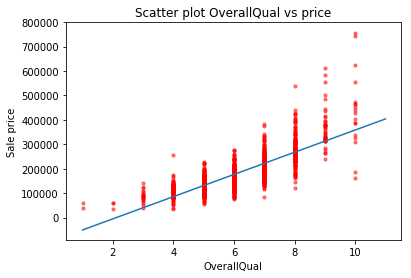

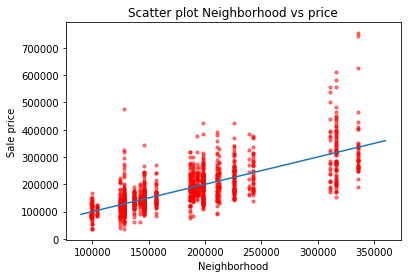

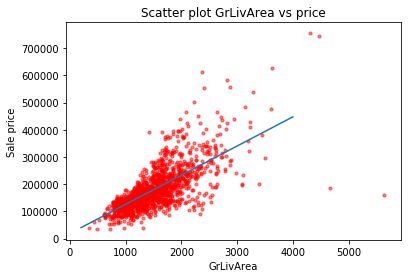

In [7]:
area=10
results = sm.OLS(Datacol[len(Datacol)-1][1:],sm.add_constant(Datacol[16][1:])).fit()
X_plot = np.linspace(1,11,1000)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
plt.scatter(Datacol[16][1:], Datacol[len(Datacol)-1][1:], s=area, c='red', alpha=0.5)
plt.title('Scatter plot OverallQual vs price')
plt.xlabel('OverallQual')
plt.ylabel('Sale price')
plt.show()
results = sm.OLS(Datacol[len(Datacol)-1][1:],sm.add_constant(Datacol[11][1:])).fit()
X_plot = np.linspace(90000,360000,1000)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
plt.scatter(Datacol[11][1:], Datacol[len(Datacol)-1][1:], s=area, c='red', alpha=0.5)
plt.title('Scatter plot Neighborhood vs price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale price')
plt.show()
results = sm.OLS(Datacol[len(Datacol)-1][1:],sm.add_constant(Datacol[45][1:])).fit()
X_plot = np.linspace(200,4000,1000)
plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
plt.scatter(Datacol[45][1:], Datacol[len(Datacol)-1][1:], s=area, c='red', alpha=0.5)
plt.title('Scatter plot GrLivArea vs price')
plt.xlabel('GrLivArea')
plt.ylabel('Sale price')
plt.show()

We make two model, model1 using all the variables, and model2 using only the most consisting ones.

In [8]:
Input=[]
for i in range(len(Datacol)-1):
    Input.append(Datacol[i][1:])
Input=invers(Input)
Input2=invers(Datacol2)
Output=Datacol[len(Datacol)-1][1:]
x1, x2, y = np.array(Input), np.array(Input2), np.array(Output)
model1 = LinearRegression().fit(x1, y)
r_sq = model1.score(x1, y)
print('coefficient of determination model1:', r_sq)
print('intercept model1:', model1.intercept_)
print('slope model1:', model1.coef_)
model2 = LinearRegression().fit(x2, y)
r_sq = model2.score(x2, y)
print('coefficient of determination model2:', r_sq)
print('intercept model2:', model2.intercept_)
print('slope model2:', model2.coef_)

coefficient of determination model1: 0.8780227650996847
intercept model1: -878368.3086570693
slope model1: [-2.07414985e+02  2.32847069e-02 -1.30239947e+02  1.96480281e-01
  3.90716453e-01  1.04901501e-01 -4.49603778e-02  1.84125966e-01
  2.05638155e+00  2.15305479e-01  2.31221057e-02  2.81163510e-01
  2.21595757e-01 -3.46465378e-01 -1.82119900e-01 -8.59404723e-02
  7.44334245e+03  5.38060422e+03 -1.80407377e+01 -9.67955701e+01
  1.12706709e-01  3.71099006e-01  6.34093658e-02  1.82012170e-02
 -4.79656340e-02  2.43867907e+01  8.30390763e-02 -2.14852303e-02
 -8.50658268e-03  1.38128954e-01 -2.72432338e-02  2.08474173e-01
  1.75312231e-02  4.66880766e+00 -1.93913247e-02  1.14563890e+00
 -5.85177721e+00 -3.73308353e-02  2.60884796e-02  3.94974728e-02
  6.65196152e-03 -8.14954395e-02  2.38576528e+01  1.77670163e+01
 -2.10844644e+01  2.05402047e+01  4.48260098e+03 -1.98904858e+03
  3.92348201e+03  2.70752444e+03 -1.46117460e+03 -1.38708324e+04
  1.36720230e-01  3.93840903e+03  2.71566321e-01

The second model,is better than the first, because we don't lose a lot in the coefficient of determination but we have a more resonable intercept.

we should now prepare the test data because it's possible that is has categories that didn't appear in the train data.

In [9]:
Test=[]
with open('test.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        Test.append(row[1:])

In [10]:
Testcol=invers(Test)
c=0
m=meann(Datacol[len(Datacol)-1])
for i in range(len(Test[1])):
    if not isnumeric(Test[1][i]):
        for j in range(1,len(Testcol[i])):
            if Testcol[i][j] in T[c]:
                Testcol[i][j]=str(U[c][T[c].index(Testcol[i][j])])
            else :
                Testcol[i][j]=str(m)
        c=c+1
for i in range(len(Testcol)):
    m=meann(Testcol[i])
    for j in range(1,len(Testcol[i])):
        if Testcol[i][j]=='NA':
            Testcol[i][j]=str(m)

In [11]:
convertonum(Testcol)

Making prediction from the models

In [12]:
X=invers(Testcol)
x=np.array(X[1:])
price1 = model1.predict(x)

In [13]:
Col=[]
for i in range(len(Testcol)):
    if i in Var:
        Col.append(Testcol[i][1:])
X2=invers(Col)
x2=np.array(X2)
price2 = model2.predict(x2)

In [14]:
with open('sample_submission11.csv', 'w') as csvfile:
    fieldnames = ['Id', 'SalePrice']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(price1)):
        writer.writerow({'Id': i+1461, 'SalePrice': price1[i]})

In [15]:
with open('sample_submission12.csv', 'w') as csvfile:
    fieldnames = ['Id', 'SalePrice']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(price2)):
        writer.writerow({'Id': i+1461, 'SalePrice': price2[i]})